In [56]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pickle
import seaborn as sns

import sys
sys.path.insert(0, "../code")   
from model_utils import train


In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
# load
df = pd.read_excel("../output/data/scaled_train_nonoverlap_top_10_store_item_X_y.xlsx")
df.head()

,date,store_item,store,item,sales_day_1,sales_day_2,sales_day_3,sales_day_4,sales_day_5,sales_day_6,...,y_store_med_day_5,y_store_med_day_6,y_store_med_day_7,y_item_med_day_1,y_item_med_day_2,y_item_med_day_3,y_item_med_day_4,y_item_med_day_5,y_item_med_day_6,y_item_med_day_7
0,2013-01-07,3_1047679,3,1047679,0.458730,0.073355,0.098931,0.201942,0.392058,0.811775,...,0.248855,0.293631,0.37344,0.655298,0.424149,0.176024,0.202652,0.437086,0.675746,0.711467
1,2013-01-07,3_114790,3,114790,0.022222,0.002373,0.003231,0.006214,0.010830,0.017841,...,0.248855,0.293631,0.37344,0.018270,0.018576,0.040971,0.030303,0.027815,0.068742,0.069051
2,2013-01-07,3_305229,3,305229,0.070635,0.012513,0.020134,0.019029,0.080144,0.075825,...,0.248855,0.293631,0.37344,0.060901,0.074303,0.110774,0.056818,0.047682,0.089494,0.123305
3,2013-01-07,3_314384,3,314384,0.084127,0.014671,0.020880,0.021359,0.051986,0.080285,...,0.248855,0.293631,0.37344,0.123021,0.160991,0.201821,0.155303,0.156291,0.280156,0.314427
4,2013-01-07,3_364606,3,364606,0.099206,0.022654,0.026597,0.028738,0.062094,0.116860,...,0.248855,0.293631,0.37344,0.210719,0.243034,0.295903,0.301136,0.196026,0.315175,0.383477


In [5]:
df.dtypes

date                 datetime64[ns]
store_item                   object
store                         int64
item                          int64
sales_day_1                 float64
sales_day_2                 float64
sales_day_3                 float64
sales_day_4                 float64
sales_day_5                 float64
sales_day_6                 float64
sales_day_7                 float64
store_med_day_1             float64
store_med_day_2             float64
store_med_day_3             float64
store_med_day_4             float64
store_med_day_5             float64
store_med_day_6             float64
store_med_day_7             float64
item_med_day_1              float64
item_med_day_2              float64
item_med_day_3              float64
item_med_day_4              float64
item_med_day_5              float64
item_med_day_6              float64
item_med_day_7              float64
y_sales_day_1               float64
y_sales_day_2               float64
y_sales_day_3               

In [6]:
df.columns

Index(['date', 'store_item', 'store', 'item', 'sales_day_1', 'sales_day_2',
       'sales_day_3', 'sales_day_4', 'sales_day_5', 'sales_day_6',
       'sales_day_7', 'store_med_day_1', 'store_med_day_2', 'store_med_day_3',
       'store_med_day_4', 'store_med_day_5', 'store_med_day_6',
       'store_med_day_7', 'item_med_day_1', 'item_med_day_2', 'item_med_day_3',
       'item_med_day_4', 'item_med_day_5', 'item_med_day_6', 'item_med_day_7',
       'y_sales_day_1', 'y_sales_day_2', 'y_sales_day_3', 'y_sales_day_4',
       'y_sales_day_5', 'y_sales_day_6', 'y_sales_day_7', 'y_store_med_day_1',
       'y_store_med_day_2', 'y_store_med_day_3', 'y_store_med_day_4',
       'y_store_med_day_5', 'y_store_med_day_6', 'y_store_med_day_7',
       'y_item_med_day_1', 'y_item_med_day_2', 'y_item_med_day_3',
       'y_item_med_day_4', 'y_item_med_day_5', 'y_item_med_day_6',
       'y_item_med_day_7'],
      dtype='object')

In [7]:
feature_cols = (
    [f"sales_day_{i}"     for i in range(1, 8)]  # 7 cols
  + [f"store_med_day_{i}" for i in range(1, 8)]  # 7 cols
  + [f"item_med_day_{i}"  for i in range(1, 8)]  # 7 cols
)
label_cols = (
    [f"y_sales_day_{i}"     for i in range(1,8)]
  + [f"y_store_med_day_{i}" for i in range(1,8)]
  + [f"y_item_med_day_{i}"  for i in range(1,8)]
)
# # … shift & drop to build X, y …
df = df.dropna(subset=[f'y_{c}' for c in feature_cols]).reset_index(drop=True)
df.head()

,date,store_item,store,item,sales_day_1,sales_day_2,sales_day_3,sales_day_4,sales_day_5,sales_day_6,...,y_store_med_day_5,y_store_med_day_6,y_store_med_day_7,y_item_med_day_1,y_item_med_day_2,y_item_med_day_3,y_item_med_day_4,y_item_med_day_5,y_item_med_day_6,y_item_med_day_7
0,2013-01-07,3_1047679,3,1047679,0.458730,0.073355,0.098931,0.201942,0.392058,0.811775,...,0.248855,0.293631,0.37344,0.655298,0.424149,0.176024,0.202652,0.437086,0.675746,0.711467
1,2013-01-07,3_114790,3,114790,0.022222,0.002373,0.003231,0.006214,0.010830,0.017841,...,0.248855,0.293631,0.37344,0.018270,0.018576,0.040971,0.030303,0.027815,0.068742,0.069051
2,2013-01-07,3_305229,3,305229,0.070635,0.012513,0.020134,0.019029,0.080144,0.075825,...,0.248855,0.293631,0.37344,0.060901,0.074303,0.110774,0.056818,0.047682,0.089494,0.123305
3,2013-01-07,3_314384,3,314384,0.084127,0.014671,0.020880,0.021359,0.051986,0.080285,...,0.248855,0.293631,0.37344,0.123021,0.160991,0.201821,0.155303,0.156291,0.280156,0.314427
4,2013-01-07,3_364606,3,364606,0.099206,0.022654,0.026597,0.028738,0.062094,0.116860,...,0.248855,0.293631,0.37344,0.210719,0.243034,0.295903,0.301136,0.196026,0.315175,0.383477


In [8]:
weights_df= pd.read_excel("../output/data/top_10_item_weights.xlsx")

In [9]:
weights_df

,item,weight
0,114790,1.00
1,305229,1.00
2,314384,1.00
3,364606,1.00
4,502331,1.25
5,567623,1.00
6,581078,1.00
7,582864,1.25
8,584028,1.25
9,1047679,1.00


In [10]:
with open('../output/data/minmax_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

In [25]:
hist_df, summary_df, models_dict = train(
    df            = df,
    scaler       = scaler,
    weights_df    = weights_df,
    feature_cols  = feature_cols,
    label_cols    = label_cols,
    item_col      = "item",
    train_frac    = 0.8,
    batch_size    = 32,
    lr            = 1e-3,
    epochs        = 50,
    seed          = 2025,
    model_dir     = "../output/models/"
)

[3_1047679] Epoch 1/50 – train_RMSLE 0.8259, train_MAE 264.9636, test_RMSLE 0.8552, test_MAE 291.6615
[3_1047679] Epoch 2/50 – train_RMSLE 0.7692, train_MAE 241.9786, test_RMSLE 0.8003, test_MAE 269.6488
[3_1047679] Epoch 3/50 – train_RMSLE 0.7106, train_MAE 217.5588, test_RMSLE 0.7408, test_MAE 245.9544
[3_1047679] Epoch 4/50 – train_RMSLE 0.6477, train_MAE 191.2279, test_RMSLE 0.6760, test_MAE 219.8445
[3_1047679] Epoch 5/50 – train_RMSLE 0.5821, train_MAE 163.4719, test_RMSLE 0.6091, test_MAE 191.8934
[3_1047679] Epoch 6/50 – train_RMSLE 0.5210, train_MAE 136.3059, test_RMSLE 0.5479, test_MAE 163.9128
[3_1047679] Epoch 7/50 – train_RMSLE 0.4738, train_MAE 112.2359, test_RMSLE 0.5001, test_MAE 138.2482
[3_1047679] Epoch 8/50 – train_RMSLE 0.4443, train_MAE 93.3363, test_RMSLE 0.4677, test_MAE 117.0011
[3_1047679] Epoch 9/50 – train_RMSLE 0.4274, train_MAE 80.1406, test_RMSLE 0.4472, test_MAE 101.4786
[3_1047679] Epoch 10/50 – train_RMSLE 0.4165, train_MAE 71.7754, test_RMSLE 0.4353, 

In [26]:
hist_df.head(3)


,store_item,epoch,train_loss,train_mae,test_loss,test_mae
0,3_1047679,1,0.825924,264.963643,0.855200,291.661451
1,3_1047679,2,0.769211,241.978634,0.800326,269.648771
2,3_1047679,3,0.710638,217.558772,0.740825,245.954443


In [27]:
summary_df.head(3)

,store_item,final_train_loss,final_test_loss
0,3_1047679,0.343407,0.411792
1,3_114790,0.177494,0.265971
2,3_305229,0.188702,0.195637


In [45]:
def plot_loss_per_sid(hist_df, 
                      title,
                      sid, 
                      fn, 
                      train_col="train_loss", 
                      test_col="test_loss"):
    """
    Plot train and test loss vs. epoch for a given store_item (sid),
    save to file `fn`.
    """
    df = hist_df[hist_df["store_item"] == sid].sort_values("epoch")
    if df.empty:
        raise ValueError(f"No data found for store_item = {sid!r}")

    fig, ax = plt.subplots(figsize=(12, 5))

    # plot
    ax.plot(df["epoch"], df[train_col], marker="o", label="Train Loss")
    ax.plot(df["epoch"], df[test_col], marker="o", label="Validation Loss")

    # titles & labels
    ax.set_title(title, fontsize=24, fontweight="bold")
    ax.set_xlabel("Epoch", fontsize=16, fontweight="bold")
    ax.set_ylabel("Loss", fontsize=16, fontweight="bold")

    # --- Dynamic x-axis ticks ---
    x_min, x_max = df["epoch"].min(), df["epoch"].max()
    x_range = x_max - x_min
    if x_range > 50:
        x_major = 10
        x_minor = 2
    elif x_range > 20:
        x_major = 5
        x_minor = 1
    elif x_range > 10:
        x_major = 2
        x_minor = 1
    else:
        x_major = 1
        x_minor = 0.5
    ax.set_xlim(x_min, x_max)
    ax.xaxis.set_major_locator(MultipleLocator(x_major))
    ax.xaxis.set_minor_locator(MultipleLocator(x_minor))

    # --- Dynamic y-axis ticks ---
    y_values = pd.concat([df[train_col], df[test_col]])
    y_min, y_max = y_values.min(), y_values.max()
    y_range = y_max - y_min
    
    if y_range < 1e-3:
        y_min, y_max = y_min - 0.5, y_max + 0.5
    else:
        margin = y_range * 0.1
        y_min -= margin
        y_max += margin
    ax.set_ylim(y_min, y_max)
    if y_range > 300:
        y_major = 50
        y_minor = 10
    elif y_range > 100:
        y_major = 20
        y_minor = 5
    elif y_range > 50:
        y_major = 10
        y_minor = 2
    elif y_range > 10:
        y_major = 2
        y_minor = 0.5
    elif y_range > 1:
        y_major = 0.5
        y_minor = 0.1
    else:
        y_major = 0.2
        y_minor = 0.05

    ax.yaxis.set_major_locator(MultipleLocator(y_major))
    ax.yaxis.set_minor_locator(MultipleLocator(y_minor))


    # grid, legend
    ax.grid(True, which="major", linestyle="--", alpha=0.5)
    ax.legend()

    # tick styling
    ax.tick_params(axis='x', which='major', length=6)
    ax.tick_params(axis='x', which='minor', length=4)
    ax.tick_params(axis='y', which='major', length=6)
    ax.tick_params(axis='y', which='minor', length=4)

    plt.tight_layout(pad=2)
    plt.savefig(fn, dpi=300)
    plt.show()
    plt.close(fig)


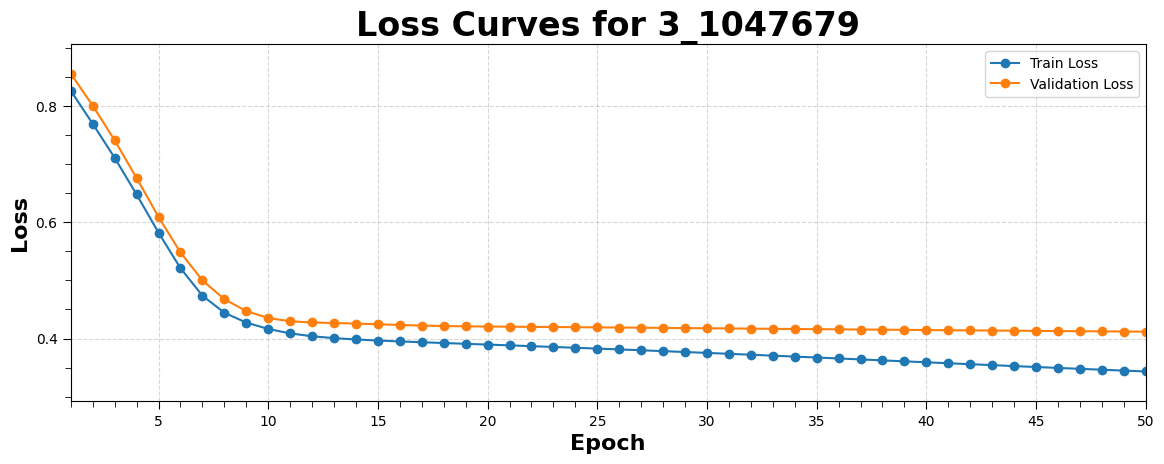

In [46]:
# to plot a single sid:
sid = "3_1047679"
title = f"Loss Curves for {sid}"
plot_loss_per_sid(hist_df, title = title,  sid=sid, fn=f"../output/figures/loss_curves_{sid}.tiff")

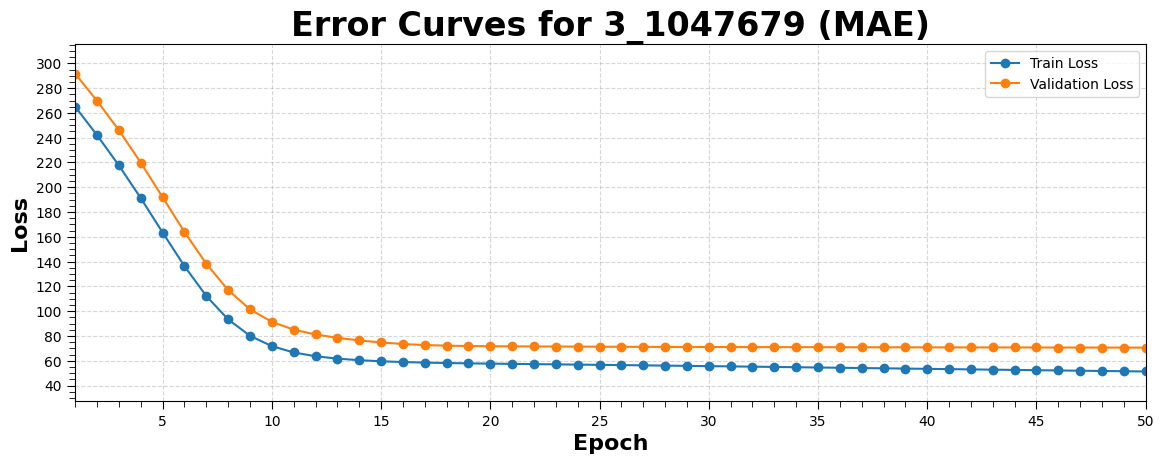

In [47]:
sid = "3_1047679"
title = f"Error Curves for {sid} (MAE)"
plot_loss_per_sid(hist_df, title=title, sid=sid, fn=f"../output/figures/loss_curves_mae_{sid}.tiff", train_col="train_mae", test_col="test_mae")

In [48]:
# Save to a new CSV
raw_df = pd.read_csv(
    "../output/data/train_top_10_store_10_item.csv",
)
raw_df.head()

/var/folders/w3/d06m5l_97yn4bnxd5t6cgbjr0000gn/T/ipykernel_90236/3168376909.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv(


,date,store_nbr,item_nbr,unit_sales,onpromotion,store_item
0,2013-01-07,48,502331,70.000,NaN,48_502331
1,2013-01-07,48,567623,25.000,NaN,48_567623
2,2013-01-07,48,581078,16.000,NaN,48_581078
3,2013-01-07,48,582864,63.676,NaN,48_582864
4,2013-01-07,49,314384,34.000,NaN,49_314384


In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sales_histogram(df: pd.DataFrame, 
                         sid: str, 
                         bins: int = 50, 
                         log_scale: bool = False,
                         fn: str = None):
    """
    Plot histogram of unit_sales for a specific store_item (sid).
    
    Parameters:
        df: pd.DataFrame – main dataset containing 'unit_sales' and 'store_item'
        sid: str – store_item ID to filter the data
        bins: int – number of histogram bins
        log_scale: bool – if True, applies log10 to x-axis
    """
    sub_df = df[df["store_item"] == sid]

    if sub_df.empty:
        raise ValueError(f"No data found for store_item = {sid!r}")

    sales = sub_df["unit_sales"].astype(float)
    if log_scale:
        sales = sales[sales > 0]  # avoid log(0)
        sales = np.log10(sales)

    plt.figure(figsize=(10, 6))
    sns.histplot(sales, bins=bins, kde=True, color="skyblue", edgecolor="black")
    plt.title(f"Distribution of Unit Sales for {sid}", fontsize=24, fontweight="bold")
    plt.xlabel("log10(Unit Sales)" if log_scale else "Unit Sales", fontsize=16, fontweight="bold")
    plt.ylabel("Frequency", fontsize=16, fontweight="bold")
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    if fn:
        plt.savefig(fn, dpi=300)
    plt.show()
    plt.close()


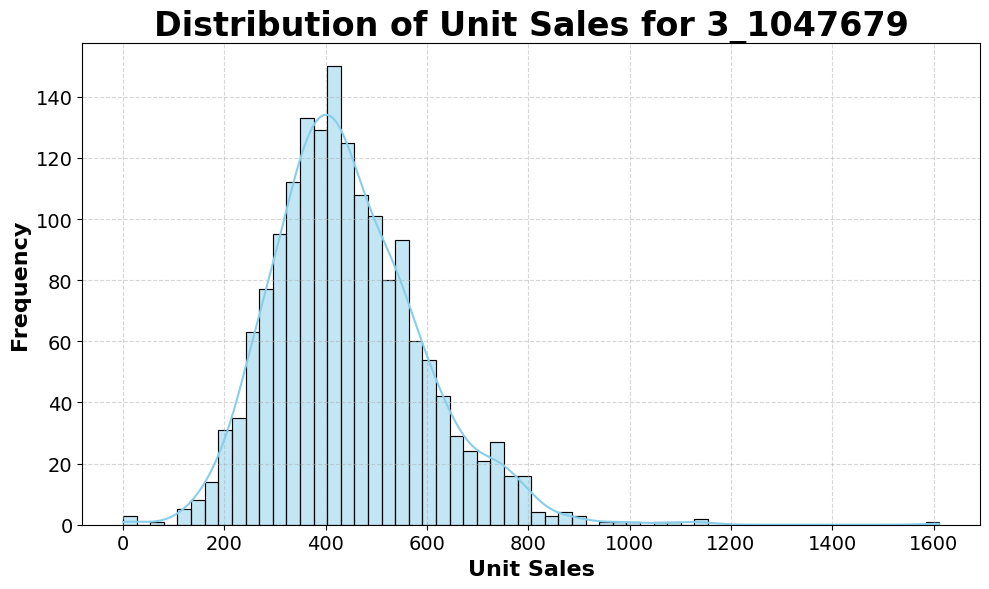

In [91]:
plot_sales_histogram(raw_df, sid="3_1047679", bins=60, log_scale=False,fn=f"../output/figures/sales_hist_{sid}.tiff")


In [21]:

def plot_all_sids_losses(hist_df, overall_title=None, fn=None):
    sids   = hist_df["store_item"].unique()
    epochs = sorted(hist_df["epoch"].unique())
    
    fig, (ax_tr, ax_te) = plt.subplots(2,1, figsize=(12,8), sharex=True)

    # — Train Loss —
    for sid in sids:
        df_sid = hist_df[hist_df["store_item"]==sid]
        ax_tr.plot(df_sid["epoch"], df_sid["train_loss"],
                   marker="o", linewidth=1, label=sid)
    ax_tr.set_title("Train Loss by Epoch", fontsize=16, fontweight="bold")
    ax_tr.set_ylabel("Train Loss")
    ax_tr.grid(True, linestyle="--", alpha=0.5)
    #ax_tr.legend(fontsize="small", ncol=2, bbox_to_anchor=(1.02,1), loc="best")

    # — Validation Loss —
    for sid in sids:
        df_sid = hist_df[hist_df["store_item"]==sid]
        ax_te.plot(df_sid["epoch"], df_sid["test_loss"],
                   marker="o", linewidth=1, label=sid)
    ax_te.set_title("Validation Loss by Epoch", fontsize=16, fontweight="bold")
    ax_te.set_xlabel("Epoch")
    ax_te.set_ylabel("Validation Loss")
    ax_te.grid(True, linestyle="--", alpha=0.5)
    #ax_te.legend(fontsize="small", ncol=2, bbox_to_anchor=(1.02,1), loc="best")

    # — Ticks every epoch, bigger & bold —
    for ax in (ax_tr, ax_te):
        ax.xaxis.set_major_locator(MultipleLocator(1))
        ax.set_xlim(hist_df['epoch'].min(), hist_df['epoch'].max())  # Clamp x-axis
        # enlarge & bold tick labels
        for lbl in ax.get_xticklabels(which="major"):
            lbl.set_fontsize(10)
            lbl.set_fontweight("bold")
        for lbl in ax.get_yticklabels(which="major"):
            lbl.set_fontsize(10)
            lbl.set_fontweight("bold")

    # — Add overall title if provided —
    if overall_title:
        fig.suptitle(overall_title, fontsize=20, fontweight="bold")
        # tighten_layout will by default overlap the suptitle, so add this:
        plt.subplots_adjust(top=0.90)
        
    plt.tight_layout(pad=3)
    if fn:
        plt.savefig(fn, dpi=300, bbox_inches="tight")
    plt.show()
    plt.close(fig)

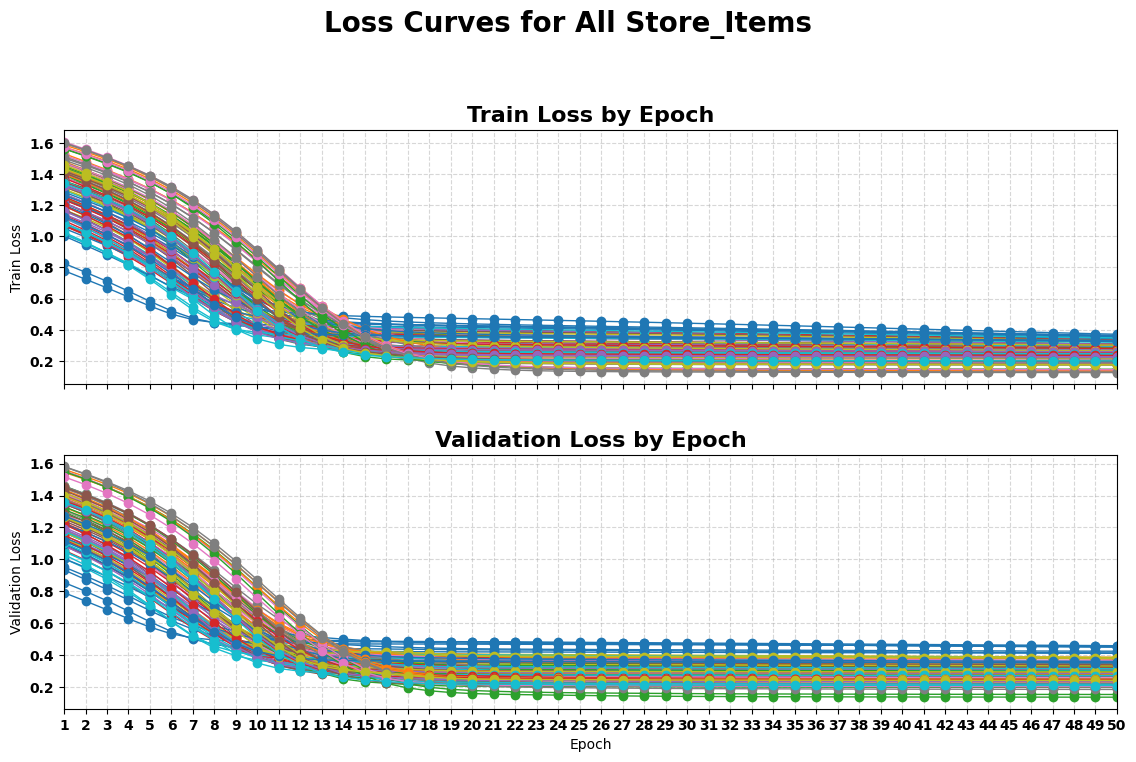

In [22]:
# Example usage:
plot_all_sids_losses(hist_df, 
                     overall_title="Loss Curves for All Store_Items",
fn=f"../output/figures/all_sids_loss_curves_.tiff")
